In [ ]:

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers.pooling import MaxPool2D
from keras.layers.pooling import GlobalAvgPool2D
from keras import backend as K
from tensorflow.keras import regularizers
tf.__version__

Using TensorFlow backend.


'2.2.0'

In [ ]:
!curl -L https://app.roboflow.ai/ds/3fZYcO8lo1?key=qyRmcj1Q3Q > roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   889  100   889    0     0   1365      0 --:--:-- --:--:-- --:--:--  1365
100  210M  100  210M    0     0  51.2M      0  0:00:04  0:00:04 --:--:-- 68.4M


In [ ]:

from zipfile import ZipFile
file="roboflow.zip"

with ZipFile(file,'r') as zip:
  zip.extractall()

In [ ]:
rm roboflow.zip

In [ ]:
PATH='/content'

train_dir = os.path.join(PATH,'train')
valid_dir = os.path.join(PATH,'valid')

train_healthy_dir = os.path.join(train_dir,'healthy')
train_multiple_diseases_dir = os.path.join(train_dir,'multiple_diseases')
train_rust_dir = os.path.join(train_dir,'rust')
train_scab_dir = os.path.join(train_dir,'scab')

valid_healthy_dir = os.path.join(valid_dir,'healthy')
valid_multiple_diseases_dir = os.path.join(valid_dir,'multiple_diseases')
valid_rust_dir = os.path.join(valid_dir,'rust')
valid_scab_dir = os.path.join(valid_dir,'scab')

num_healthy_train = len(os.listdir(train_healthy_dir))
num_multiple_diseases_train = len(os.listdir(train_multiple_diseases_dir))
num_rust_train = len(os.listdir(train_rust_dir))
num_scab_train = len(os.listdir(train_scab_dir))

num_healthy_valid = len(os.listdir(valid_healthy_dir))
num_multiple_diseases_valid = len(os.listdir(valid_multiple_diseases_dir))
num_rust_valid = len(os.listdir(valid_rust_dir))
num_scab_valid = len(os.listdir(valid_scab_dir))

total_train = num_healthy_train + num_multiple_diseases_train + num_rust_train+num_scab_train
total_val = num_healthy_valid + num_multiple_diseases_valid + num_rust_valid+num_scab_valid

print(total_train)

print(total_val)


3079
273


In [ ]:
IMG_HEIGHT = 200
IMG_WIDTH = 200
batch_size = 256

image_gen_train = ImageDataGenerator(rescale=1./255)
                    
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                   directory=valid_dir,
                                                   target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                   class_mode='categorical')


Found 3079 images belonging to 4 classes.
Found 273 images belonging to 4 classes.


In [ ]:
from keras.models import load_model
model_2 = load_model('model_2.h5')
model_2.summary()

In [ ]:
layer_1=model_2.get_layer(name='conv2d_26')
weights_1=layer_1.get_weights()

layer_2=model_2.get_layer(name='conv2d_27')
weights_2=layer_2.get_weights()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Conv2D)             (None, 196, 196, 32)      2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
layer_2 (Conv2D)             (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 128)       8320      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 128)      

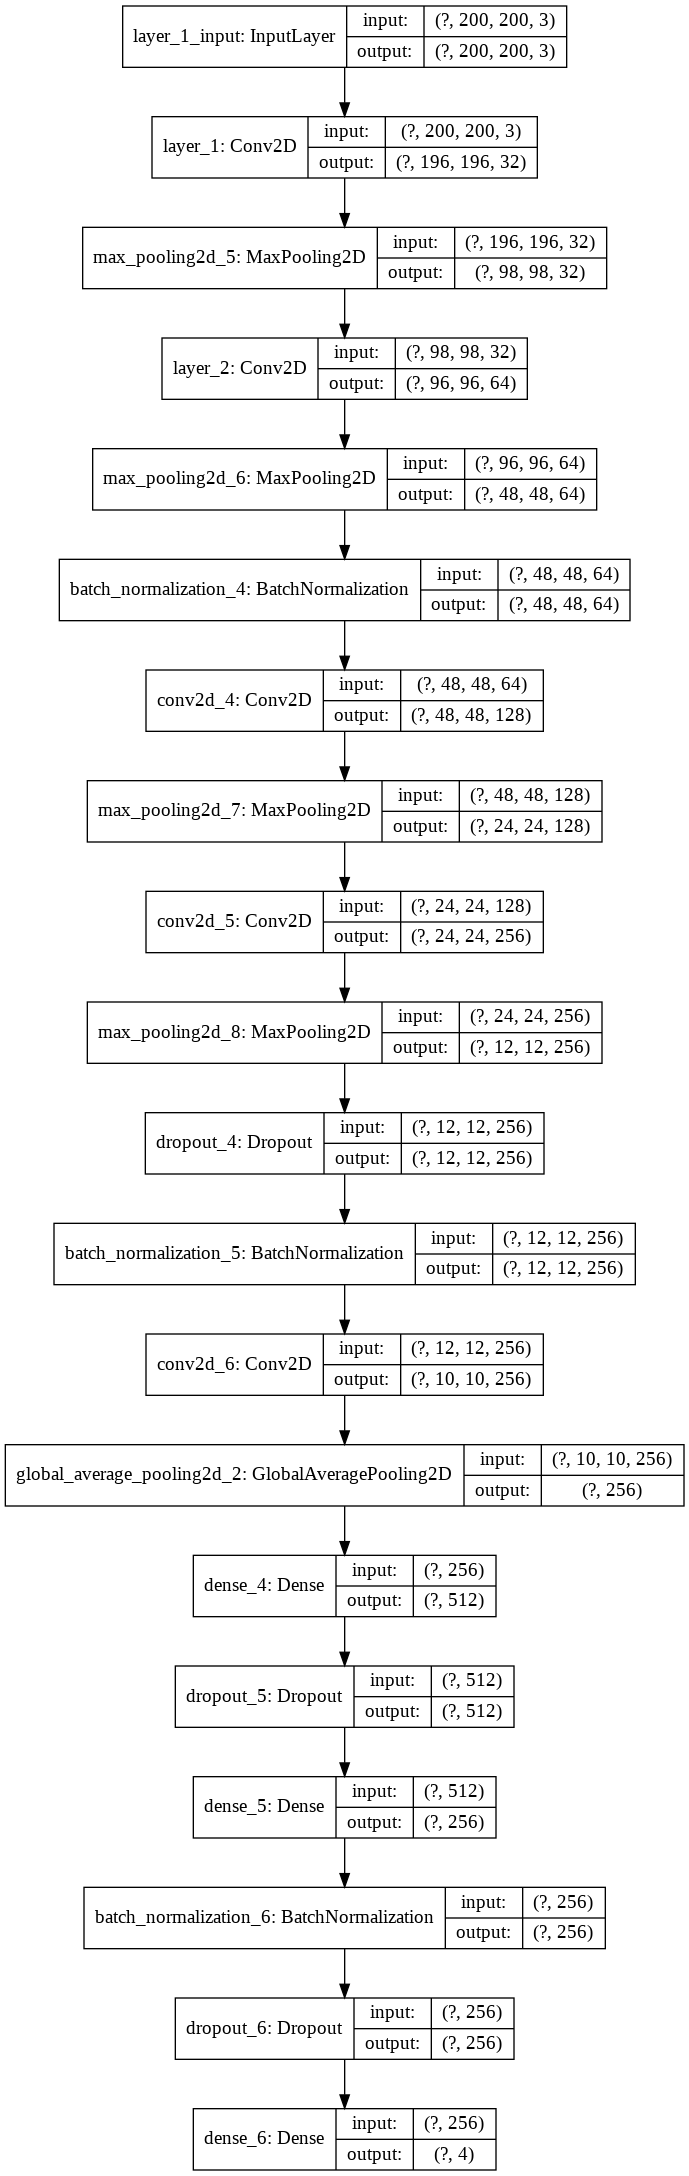

In [ ]:


def build(width, height, depth, classes, init="he_normal"):
  # initialize the model along with the input shape to be

  model=Sequential()
  inputShape=(width, height, depth)
  model.add(Conv2D(32,(5,5),strides=(1,1),activation="relu",kernel_initializer=init,input_shape=inputShape,name='layer_1'))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(64,(3,3),strides=(1,1),activation="relu",kernel_initializer=init,name='layer_2'))
  model.add(MaxPool2D((2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(128,(1,1),strides=(1,1),kernel_initializer=init))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(256,(1,1),strides=(1,1),activation="relu",kernel_initializer=init,))
  model.add(MaxPool2D((2,2)))
  model.add(Dropout(0.55))
  model.add(BatchNormalization())
  model.add(Conv2D(256,(3,3),strides=(1,1),activation="relu",kernel_initializer=init))
  model.add(GlobalAvgPool2D())
  model.add(Dense(512,activation="relu",kernel_initializer=init))
  model.add(Dropout(0.8))
  model.add(Dense(256,activation="relu",kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(Dropout(0.6))
  model.add(Dense(classes,activation="softmax",kernel_initializer=init))

  #model.get_layer(name='layer_1').trainable = False
  #model.get_layer(name='layer_2').trainable = False
  
  #model.get_layer(name='layer_1').set_weights(weights_1)
  #model.get_layer(name='layer_2').set_weights(weights_2)

  return model

model_5=build(IMG_HEIGHT,IMG_WIDTH,3,4)
model_5.summary()
keras.utils.plot_model(model_5,show_shapes=True)



In [ ]:

model_5.compile(optimizer=keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
batch_size = 128
epochs = 100

history = model_5.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size,
    )




Epoch 1/100
24/24 [==============================] - 60s 3s/step - loss: 1.7429 - accuracy: 0.4304 - val_loss: 2.1232 - val_accuracy: 0.3223
Epoch 2/100
24/24 [==============================] - 55s 2s/step - loss: 0.9946 - accuracy: 0.6555 - val_loss: 4.5957 - val_accuracy: 0.3223
Epoch 3/100
24/24 [==============================] - 58s 2s/step - loss: 0.6301 - accuracy: 0.7771 - val_loss: 6.3713 - val_accuracy: 0.3223
Epoch 4/100
24/24 [==============================] - 55s 2s/step - loss: 0.6682 - accuracy: 0.8211 - val_loss: 8.8647 - val_accuracy: 0.3223
Epoch 5/100
24/24 [==============================] - 54s 2s/step - loss: 0.5705 - accuracy: 0.8441 - val_loss: 8.2108 - val_accuracy: 0.3223
Epoch 6/100
24/24 [==============================] - 55s 2s/step - loss: 0.4315 - accuracy: 0.8657 - val_loss: 6.8044 - val_accuracy: 0.3223
Epoch 7/100
24/24 [==============================] - 56s 2s/step - loss: 0.4794 - accuracy: 0.8666 - val_loss: 8.6312 - val_accuracy: 0.3223
Epoch 8/100
2

In [ ]:
import plotly.graph_objects as go
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['accuracy'],
                         mode='lines+markers',
                         name='Training accuracy'))
fig2.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_accuracy'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig2.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig2.show()

In [ ]:
model_5.save('model_5.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning:

TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).

